In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(3,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
bs=30         #Setting batch size
train_dir = "/content/train"   #Setting training directory
validation_dir = "/content/test"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical', target_size=(180,180))

Found 1465 images belonging to 3 classes.
Found 893 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=30,
                    validation_steps=50 // bs,
                    verbose=2)

Epoch 1/30
5/5 - 11s - loss: 0.9123 - acc: 0.6414 - val_loss: 0.7321 - val_acc: 0.4667 - 11s/epoch - 2s/step
Epoch 2/30
5/5 - 7s - loss: 0.7335 - acc: 0.5867 - val_loss: 0.7260 - val_acc: 0.6000 - 7s/epoch - 1s/step
Epoch 3/30
5/5 - 7s - loss: 0.6524 - acc: 0.7000 - val_loss: 0.7292 - val_acc: 0.5333 - 7s/epoch - 1s/step
Epoch 4/30
5/5 - 8s - loss: 0.6278 - acc: 0.6800 - val_loss: 0.7301 - val_acc: 0.4667 - 8s/epoch - 2s/step
Epoch 5/30
5/5 - 7s - loss: 0.6520 - acc: 0.7000 - val_loss: 0.6920 - val_acc: 0.5667 - 7s/epoch - 1s/step
Epoch 6/30
5/5 - 7s - loss: 0.6694 - acc: 0.6400 - val_loss: 0.7171 - val_acc: 0.5333 - 7s/epoch - 1s/step
Epoch 7/30
5/5 - 7s - loss: 0.6469 - acc: 0.6667 - val_loss: 0.7768 - val_acc: 0.5000 - 7s/epoch - 1s/step
Epoch 8/30
5/5 - 6s - loss: 0.6414 - acc: 0.6533 - val_loss: 0.7498 - val_acc: 0.4667 - 6s/epoch - 1s/step
Epoch 9/30
5/5 - 8s - loss: 0.6099 - acc: 0.7067 - val_loss: 0.6523 - val_acc: 0.6333 - 8s/epoch - 2s/step
Epoch 10/30
5/5 - 7s - loss: 0.6044

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


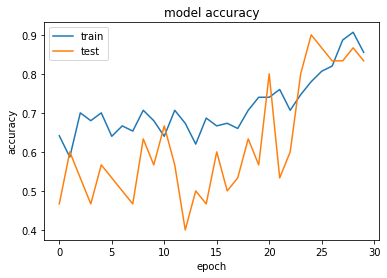

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


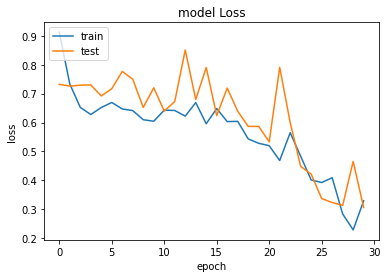

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model.save('mymodel.h5',history)

In [25]:
from keras.models import Sequential,load_model
mymodel=load_model('mymodel.h5')

In [26]:
import cv2
import matplotlib.pyplot as plt

In [30]:
test_image=image.load_img('/content/test/normal/49 (1).jpg',
                          target_size=(180,180,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("normal")
else:
  print("stroke")

1/1 [==============================] - 0s 33ms/step
normal


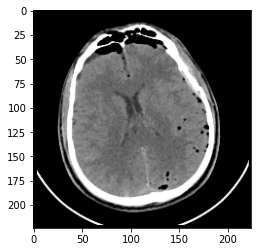

In [31]:
im = cv2.imread('/content/test/normal/49 (1).jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
test_image=image.load_img('/content/test/normal/49 (1).jpg',
                          target_size=(180,180,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("normal")
else:
  print("stroke")

1/1 [==============================] - 0s 36ms/step
normal


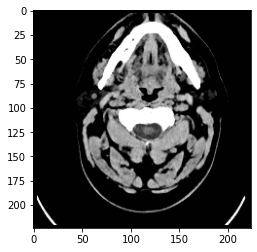

In [34]:
im = cv2.imread('/content/test/stroke/58 (1).jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
test_image=image.load_img('/content/test/stroke/58 (1).jpg',
                          target_size=(180,180,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 1):
  print("normal")
else:
  print("stroke")

1/1 [==============================] - 0s 58ms/step
stroke
